<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/rbf_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x: [0 0], y_true: 0, y_pred: 0
x: [0 1], y_true: 1, y_pred: 1
x: [1 0], y_true: 1, y_pred: 1
x: [1 1], y_true: 0, y_pred: 0


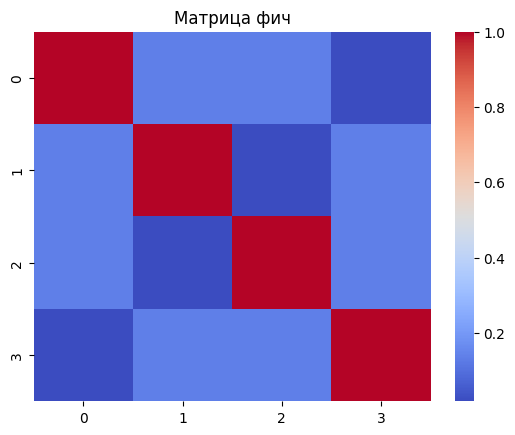

[[1.         0.13533528 0.13533528 0.01831564]
 [0.13533528 1.         0.01831564 0.13533528]
 [0.13533528 0.01831564 1.         0.13533528]
 [0.01831564 0.13533528 0.13533528 1.        ]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Экспоненциальная функция преобразует расстояние в вероятностное значение.
def rbf(x, c, sigma):
  return np.exp(-np.linalg.norm(x - c)**2 / (2 * sigma**2))


# Данные
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Параметры RBF
centers = X  # Центры обычно выбираются из самих данных или случайным образом.


sigma = 0.5  # Сигма влияет на обобщающую способность модели.
             # Слишком маленькая сигма может привести к переобучению,
             # а слишком большая - к недообучению.


# Матрица фич используется для хранения результатов вычислений RBF-функции.
# Количество строк матрицы равно количеству данных в X,
# а количество столбцов равно количеству центров centers.
phi = np.zeros((len(X), len(centers)))
for i in range(len(X)):
  for j in range(len(centers)):
    phi[i, j] = rbf(X[i], centers[j], sigma)


# RBF-функция измеряет сходство между точкой данных и центром.
# Чем ближе точка данных к центру, тем больше значение RBF.
# Матрица фич позволяет преобразовать исходные данные в пространство
# более высокой размерности, где данные могут быть линейно разделимы.


# Обучение
weights = np.linalg.pinv(phi) @ y


# Представим, что у нас есть система линейных уравнений вида:
# y = X * w
# Чтобы найти w, мы можем использовать псевдообратную матрицу:
# w = X_pinv * y


# Предсказание
def predict(x):
  phi_test = np.array([rbf(x, c, sigma) for c in centers])
  return np.where(np.dot(phi_test, weights) >= 0.5, 1, 0)

# Проверка
for x, y_true in zip(X, y):
  y_pred = predict(x)
  print(f"x: {x}, y_true: {y_true}, y_pred: {y_pred}")

# Визуализация матрицы фич как тепловой карты
sns.heatmap(phi, cmap='coolwarm')
plt.title('Матрица фич')
plt.show()
print(phi)

In [11]:
-np.linalg.norm(np.array([1,1]) - np.array([0,0]))**2
# Вычисляет расстояние между точками (1, 1) и (0, 0) в двумерном пространстве.
# Евклидово расстояние равно квадратному корню из суммы квадратов разностей соответствующих координат.

-2.0000000000000004

In [12]:
-np.linalg.norm(np.array([1,1]) - np.array([0,0]))**2 / (2 * 0.5**2)

-4.000000000000001

In [13]:
np.exp(1)

2.718281828459045

In [14]:
np.exp(0)

1.0

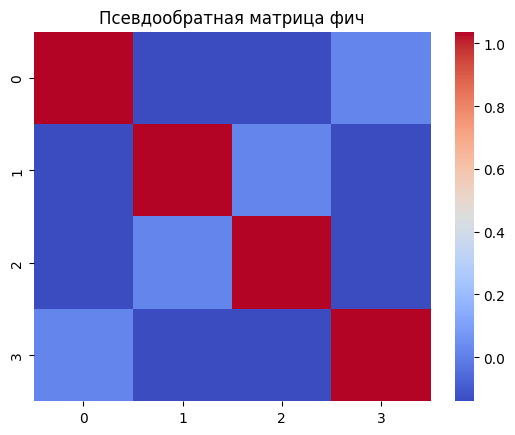

[[ 1.03766282 -0.14043239 -0.14043239  0.01900546]
 [-0.14043239  1.03766282  0.01900546 -0.14043239]
 [-0.14043239  0.01900546  1.03766282 -0.14043239]
 [ 0.01900546 -0.14043239 -0.14043239  1.03766282]]


In [15]:
phi_pinv = np.linalg.pinv(phi)
sns.heatmap(phi_pinv, cmap='coolwarm')

plt.title('Псевдообратная матрица фич')
plt.show()
print(phi_pinv)

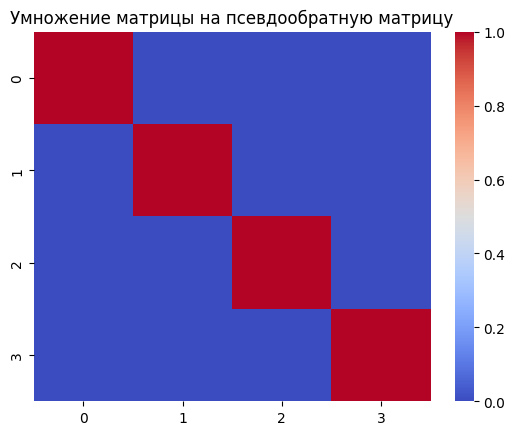

[[ 1.00000000e+00  4.40772220e-18 -2.47356963e-18 -5.49111106e-16]
 [-2.27540388e-16  1.00000000e+00 -1.08710332e-17 -2.94666960e-16]
 [-2.37515048e-16  1.03674928e-16  1.00000000e+00 -1.55889082e-16]
 [-1.11022302e-16 -3.60822483e-16  1.94289029e-16  1.00000000e+00]]


In [16]:
a1 = phi @ phi_pinv


sns.heatmap(a1, cmap='coolwarm')

plt.title('Умножение матрицы на псевдообратную матрицу')
plt.show()


print(phi @ phi_pinv)

In [17]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])

C = A @ B

print(C)

[[ 58  64]
 [139 154]]
